**Otras formas de analizar el supuesto de la clase pasada (linealidad y cambio estructural)**

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats.api as sms

In [2]:
data=pd.read_csv(r"C:\Users\57317\Desktop\Universidad Nacional\Programación\Python\Curso Econometría básica con Python\Bases de Datos\GujaratiPorter71.txt", delimiter = "\t")

In [3]:
data.head()

,CM,FLR,PGNP,TFR
0,128,37,1870,6.66
1,204,22,130,6.15
2,202,16,310,7.00
3,197,65,570,6.25
4,96,76,2050,3.81


In [4]:
modelo=sm.OLS(data["CM"],sm.add_constant(data[["PGNP","FLR"]]))
resultados=modelo.fit()
print(resultados.summary())

                            OLS Regression Results                            
Dep. Variable:                     CM   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     73.83
Date:                Thu, 21 Oct 2021   Prob (F-statistic):           5.12e-17
Time:                        16:33:31   Log-Likelihood:                -328.10
No. Observations:                  64   AIC:                             662.2
Df Residuals:                      61   BIC:                             668.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        263.6416     11.593     22.741      0.0

**Supuesto de Cambio Estructural**

In [5]:
residuos= resultados.resid

cambio_estructural = sms.breaks_cusumolsresid(residuos)
nombres = ["Estadístico", "P-valor", "Valores Críticos"]

In [6]:
pd.DataFrame({"CUSUM" : cambio_estructural}, index=nombres)

,CUSUM
Estadístico,0.519197
P-valor,0.950323
Valores Críticos,"[(1, 1.63), (5, 1.36), (10, 1.22)]"


In [7]:
valores_estimados= resultados.predict

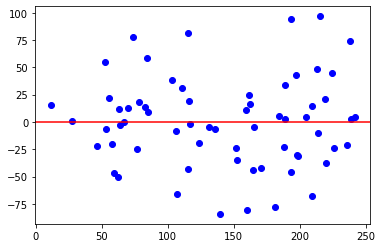

In [27]:
fig,ax=plt.subplots()
ax.scatter(valores_estimados(),residuos,color="blue")
ax.axhline(color = "red")
plt.show()

**Supuesto de Linealidad**

In [37]:
resultados_linealidad = sms.linear_harvey_collier(resultados)
nombres = ["Estadistico","p-valor"]
pd.Series(resultados_linealidad, index = nombres)

Estadistico   -0.075064
p-valor        0.940414
dtype: float64

In [38]:
pd.DataFrame(pd.Series(resultados_linealidad, index =nombres), columns = ["Harvey-Collier"])

,Harvey-Collier
Estadistico,-0.075064
p-valor,0.940414


In [32]:
# Otra forma de hacerlo es 
pd.DataFrame({"Harvey-Collier":resultados_linealidad}, index =nombres)
# Ho = es lineal

,Harvey-Collier
Estadistico,-0.075064
p-valor,0.940414


In [41]:
resultados_rainbow= sms.linear_rainbow(resultados) 
resultados_rainbow

(0.692622027874274, 0.8439553449801276)

In [40]:
nombres = ["Estadístico","p-valor"]

In [42]:
pd.DataFrame({"Rainbow":resultados_rainbow}, index = nombres)
# Ho = es lineal

,Rainbow
Estadístico,0.692622
p-valor,0.843955


In [43]:
np.mean(residuos)

1.254552017826427e-13

**Supuesto 4: Homoscedasticidad**

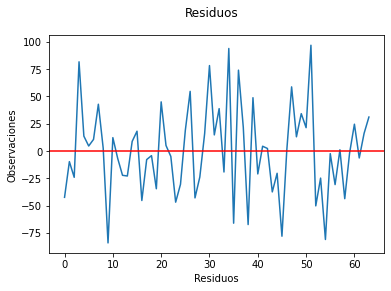

In [47]:
fig, ax = plt.subplots()
fig.suptitle("Residuos")
ax.plot(residuos) #hace el dibujito
ax.set_ylabel("Observaciones")
ax.set_xlabel("Residuos")
ax.axhline(color = "red")
plt.show()

In [48]:
explicativas = resultados.model.exog
resultados_test = sms.het_breuschpagan(residuos, explicativas)
nombres_test = ["Estadístico LM", "P-value LM", "Estadístico F", "P-value F"]
pd.Series(resultados_test, index = nombres_test)

Estadístico LM    1.591582
P-value LM        0.451224
Estadístico F     0.777832
P-value F         0.463904
dtype: float64

In [49]:
pd.DataFrame({"Breusch Pagan":resultados_test}, index = nombres_test)

,Breusch Pagan
Estadístico LM,1.591582
P-value LM,0.451224
Estadístico F,0.777832
P-value F,0.463904


In [50]:
pd.DataFrame(pd.Series(resultados_test, index = nombres_test), columns = ["BreushPagan"])

,BreushPagan
Estadístico LM,1.591582
P-value LM,0.451224
Estadístico F,0.777832
P-value F,0.463904


In [51]:
test_white = sms.het_white(residuos,explicativas)
nombres_test = ["Estadístico LM", "P-value LM", "Estadístico F", "P-value F"]
pd.Series(test_white, index = nombres_test)

Estadístico LM    2.356718
P-value LM        0.797902
Estadístico F     0.443486
P-value F         0.816252
dtype: float64

**Supuesto de No Autocorrelación**

In [52]:
test_dw = sms.durbin_watson(residuos)
nombres_dw = ["Estadístico DW"]
pd.Series(test_dw,index = nombres_dw)
# H0 = No correlación serial de los residuos 

Estadístico DW    2.186159
dtype: float64

In [56]:
# H0 = No correlación serial de los residuos  en 2 nivel
test_breush = sms.acorr_breusch_godfrey(resultados, nlags= 2)
nombres_test = ["Estadístico LM", "P-value LM", "Estadístico F", "P-value F"]
pd.Series(test_breush, index = nombres_test)

Estadístico LM    0.950231
P-value LM        0.621813
Estadístico F     0.444598
P-value F         0.643212
dtype: float64

In [55]:
test_jungbox= sms.acorr_ljungbox(residuos, lags = 1, 
                                       boxpierce=True)
nombres_jungbox = ["Estadístico LB", "p-value LB", "Estadístico BP", "p-value BP"]
pd.Series(test_jungbox, index = nombres_jungbox)

C:\Users\57317\anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


Estadístico LB    [0.7549153999366602]
p-value LB        [0.3849244343516546]
Estadístico BP    [0.7206010635759029]
p-value BP        [0.3959468201677663]
dtype: object

**Supuesto de normalidad**

In [ ]:
# Las Ho = normalidad

In [57]:
test_jb= sms.jarque_bera(residuos)
nombres_jb = ["JB", "p-value","Asimetría","Curtosis"]
pd.Series(test_jb, index =nombres_jb)

JB           0.559405
p-value      0.756009
Asimetría    0.227575
Curtosis     2.948855
dtype: float64

In [58]:
test_ad = sms.normal_ad(residuos)
nombres_ad=["AD","p-valor AD"]
pd.Series(test_ad, index = nombres_ad)

AD            0.329856
p-valor AD    0.508773
dtype: float64

In [59]:
test_ks= sms.diagnostic.kstest_normal(residuos)
nombres_ks = ["KS", "p-valor KS"]
pd.Series(test_ks, index = nombres_ks)

KS            0.081275
p-valor KS    0.426935
dtype: float64

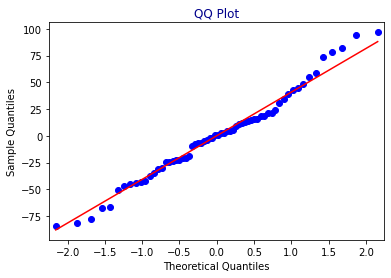

In [62]:
fig, ax = plt.subplots()
probplot = sm.ProbPlot(residuos)
probplot.qqplot(line = "s", ax = ax)
ax.set_title("QQ Plot", color = "darkblue");

**Funciones de Probabilidad (Acumulada)**

In [66]:
x = np.sort(residuos)
n = x.size 
y = np.arange(1, n+1) / n 

In [68]:
residuos_teoricos = np.random.normal(loc = np.mean(residuos),
scale = np.std(residuos),
size = 10000)

In [69]:
x_teor = np.sort(residuos_teoricos)
n_teor = x_teor.size
y_teor = np.arange(1, n_teor+1) / n_teor

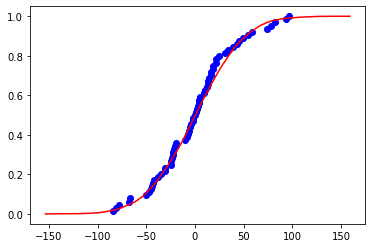

In [73]:
fig, ax = plt.subplots()
ax.plot(x_teor, y_teor, color = "red")
ax.scatter(x,y, color = "blue")
plt.show()

# Los residuos son normales